In [5]:
import numpy as np
import os
import pandas as pd 
import matplotlib.pyplot as plt

os.chdir('/Users/matthiasboeker/Desktop/Master_Thesis/Schizophrenia_Depression_Project')
from Modules.func.result_entities import *
from Modules.func.load_state_seq import *
from Modules.func.support_functions import *

In [6]:
shizophrenia_p, shizophrenia_c = load_data()
#Reshape 
shizophrenia_p = [np.array(X).reshape(len(X), 1) for X in shizophrenia_p]
shizophrenia_c = [np.array(X).reshape(len(X), 1) for X in shizophrenia_c]
patients_res, control_res = load_entities(directory='/Users/matthiasboeker/Desktop/Master_Thesis/Schizophrenia_Depression_Project/Results/latest_timedep/')

## Model fit 

### Load in data

In [7]:
directory='/Users/matthiasboeker/Desktop/Master_Thesis/Schizophrenia_Depression_Project/Results/likelihood/'
os.chdir(directory+'control/log_prob')
files = os.listdir()
files.sort(key=natural_keys)
if '.DS_Store' in files:
    files.remove('.DS_Store')
binn_c = []
for j in range(0,len(files)):
    binn_c.append(np.genfromtxt(files[j], delimiter = ','))

In [8]:
directory='/Users/matthiasboeker/Desktop/Master_Thesis/Schizophrenia_Depression_Project/Results/likelihood/'
os.chdir(directory+'patient/log_prob')
files = os.listdir()
files.sort(key=natural_keys)
if '.DS_Store' in files:
    files.remove('.DS_Store')
binn_p = []
for j in range(0,len(files)):
    binn_p.append(np.genfromtxt(files[j], delimiter = ','))

In [9]:
log_lik_p = np.asarray(binn_p).T
log_lik_c = np.asarray(binn_c).T

[(-141000, 0)]

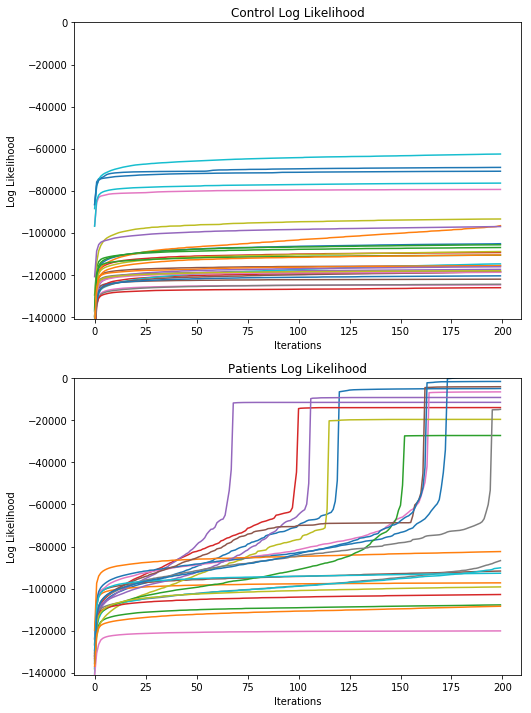

In [10]:
fig, (ax0,ax1) = plt.subplots(2, 1, figsize=(8,12))
ax0.set_title('Control Log Likelihood')
ax0.set_ylabel('Log Likelihood')
ax0.set_xlabel('Iterations')
ax0.plot(log_lik_c)
ax0.set(ylim=(-141000, 0))
ax1.set_title('Patients Log Likelihood')
ax1.set_ylabel('Log Likelihood')
ax1.set_xlabel('Iterations')
ax1.plot(log_lik_p)
ax1.set(ylim=(-141000, 0))

### Calculate AIC

In [11]:
AIC_p = -2*(log_lik_p) + 4
AIC_c = -2*(log_lik_c) + 4

### Compare 

In [12]:
from Modules.time_homo_HMM import *
th_models_p = []
th_models_c = []
load_in_HMM_models(th_models_p, th_models_c)
homo_log_lik_p = np.array([th_models_p[i].monitor_.history[0] for i in range(0,len(th_models_p))])
homo_log_lik_c = np.array([th_models_c[i].monitor_.history[0] for i in range(0,len(th_models_c))])

In [13]:
homo_AIC_p = -2*(homo_log_lik_p) + 4
homo_AIC_c = -2*(homo_log_lik_c) + 4

In [14]:
homo_AIC = np.concatenate((homo_AIC_p,homo_AIC_c))
AIC = np.concatenate((AIC_p[-1,:],AIC_c[-1,:]))

In [15]:
homo_AIC.shape

(54,)

In [16]:
con = np.concatenate((np.ones(len(homo_AIC_p)),np.zeros(len(homo_AIC_c))))
feat_dic = {'AIC':AIC,'AIC-homo':homo_AIC,'condition': con }
hmm_Aic = pd.DataFrame(feat_dic)

Text(0,0.5,'AIC')

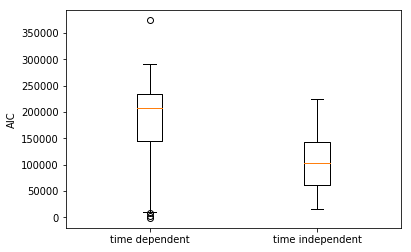

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot((hmm_Aic['AIC'],hmm_Aic['AIC-homo']),
            labels =['time dependent', 'time independent'])

ax.set_ylabel('AIC')


### Load in state sequence

In [18]:
for i in range(0, len(shizophrenia_p)): load_state_sequence(shizophrenia_p[i], patients_res[i]) 
for j in range(0, len(shizophrenia_c)): load_state_sequence(shizophrenia_c[j], control_res[j]) 


### Calculate the mean values for a day 

In [19]:
days_p = [[patients_res[l].trans_mat[:,:,i*(60*24):(i+1)*(60*24)] for i in range(0,int(len(patients_res[l].trans_mat[1,0,:])/(60*24))-1)] for l in range(0,len(patients_res))]
days_c = [[control_res[l].trans_mat[:,:,i*(60*24):(i+1)*(60*24)] for i in range(0,int(len(control_res[l].trans_mat[1,0,:])/(60*24))-1)] for l in range(0,len(control_res))]
# Day mean and standard deviation

In [20]:
day_mean_p = [np.mean(days_p[i], axis=0) for i in range(0,len(days_p))]
day_mean_c = [np.mean(days_c[i], axis=0) for i in range(0,len(days_c))]

In [21]:
index = pd.date_range(pd.Timestamp("2018-08-23 09:00"), periods=1440, freq='min')

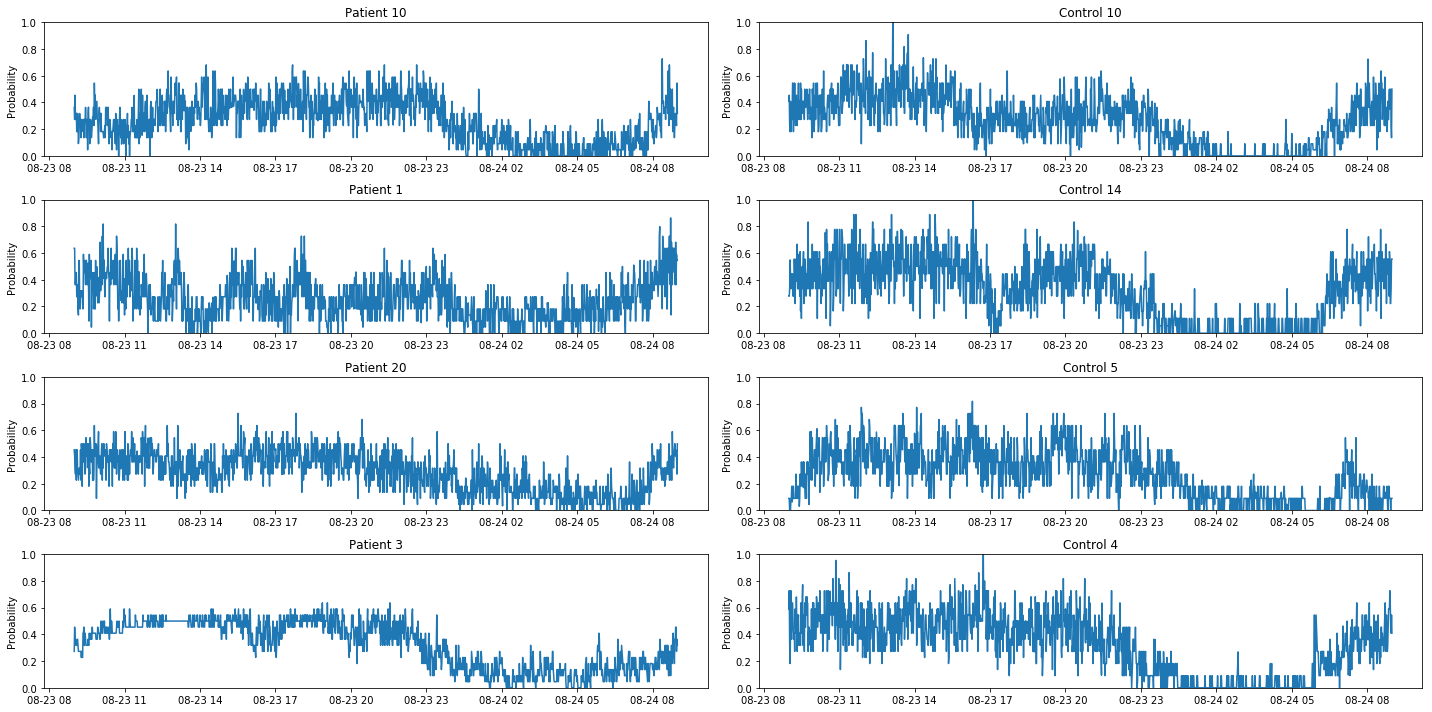

In [32]:
fig, ((ax0,ax1),(ax2,ax3),(ax4,ax5), (ax6,ax7)) = plt.subplots(4, 2, figsize=(20, 10))
ax0.plot(index,day_mean_p[10][0,1,:])
ax0.set_title('Patient 10')
ax0.set_ylabel('Probability')
ax0.set_ylim([0, 1])
ax1.plot(index,day_mean_c[10][0,1,:])
ax1.set_title('Control 10')
ax1.set_ylabel('Probability')
ax1.set_ylim([0, 1])
ax2.plot(index,day_mean_p[1][0,1,:])
ax2.set_title('Patient 1')
ax2.set_ylabel('Probability')
ax2.set_ylim([0, 1])
ax3.plot(index,day_mean_c[14][0,1,:])
ax3.set_title('Control 14')
ax3.set_ylabel('Probability')
ax3.set_ylim([0, 1])
ax4.plot(index,day_mean_p[20][0,1,:])
ax4.set_title('Patient 20')
ax4.set_ylabel('Probability')
ax4.set_ylim([0, 1])
ax5.plot(index,day_mean_c[5][0,1,:])
ax5.set_title('Control 5')
ax5.set_ylabel('Probability')
ax5.set_ylim([0, 1])
ax6.plot(index,day_mean_p[3][0,1,:])
ax6.set_ylim([0, 1])
ax6.set_ylabel('Probability')
ax6.set_title('Patient 3')
ax7.plot(index,day_mean_c[4][0,1,:])
ax7.set_ylim([0, 1])
ax7.set_ylabel('Probability')
ax7.set_title('Control 4')
fig.tight_layout()

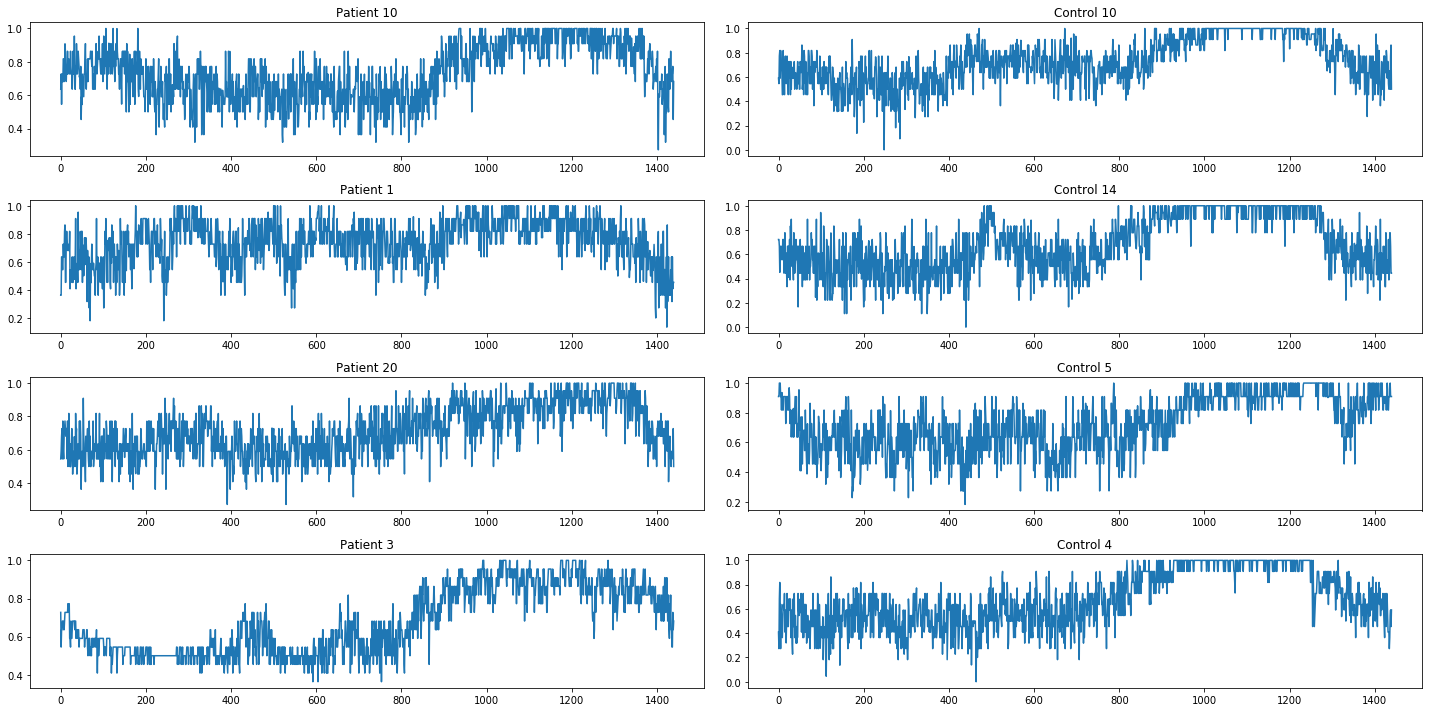

In [23]:
fig, ((ax0,ax1),(ax2,ax3),(ax4,ax5), (ax6,ax7)) = plt.subplots(4, 2, figsize=(20, 10))
ax0.plot(day_mean_p[10][0,0,:])
ax0.set_title('Patient 10')
ax1.plot(day_mean_c[10][0,0,:])
ax1.set_title('Control 10')
ax2.plot(day_mean_p[1][0,0,:])
ax2.set_title('Patient 1')
ax3.plot(day_mean_c[14][0,0,:])
ax3.set_title('Control 14')
ax4.plot(day_mean_p[20][0,0,:])
ax4.set_title('Patient 20')
ax5.plot(day_mean_c[5][0,0,:])
ax5.set_title('Control 5')
ax6.plot(day_mean_p[3][0,0,:])
ax6.set_title('Patient 3')
ax7.plot(day_mean_c[4][0,0,:])
ax7.set_title('Control 4')
fig.tight_layout()

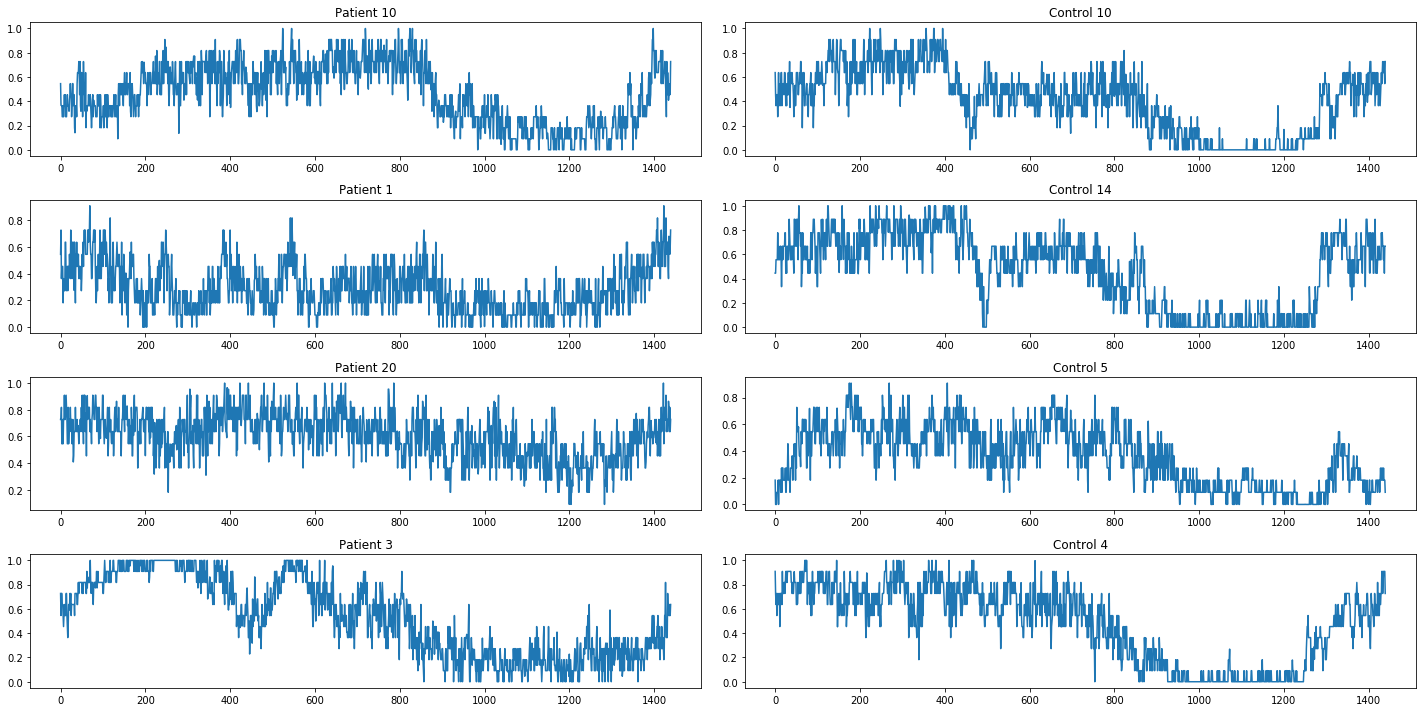

In [24]:
fig, ((ax0,ax1),(ax2,ax3),(ax4,ax5), (ax6,ax7)) = plt.subplots(4, 2, figsize=(20, 10))
ax0.plot(day_mean_p[10][1,1,:])
ax0.set_title('Patient 10')
ax1.plot(day_mean_c[10][1,1,:])
ax1.set_title('Control 10')
ax2.plot(day_mean_p[1][1,1,:])
ax2.set_title('Patient 1')
ax3.plot(day_mean_c[14][1,1,:])
ax3.set_title('Control 14')
ax4.plot(day_mean_p[20][1,1,:])
ax4.set_title('Patient 20')
ax5.plot(day_mean_c[5][1,1,:])
ax5.set_title('Control 5')
ax6.plot(day_mean_p[3][1,1,:])
ax6.set_title('Patient 3')
ax7.plot(day_mean_c[4][1,1,:])
ax7.set_title('Control 4')
fig.tight_layout()

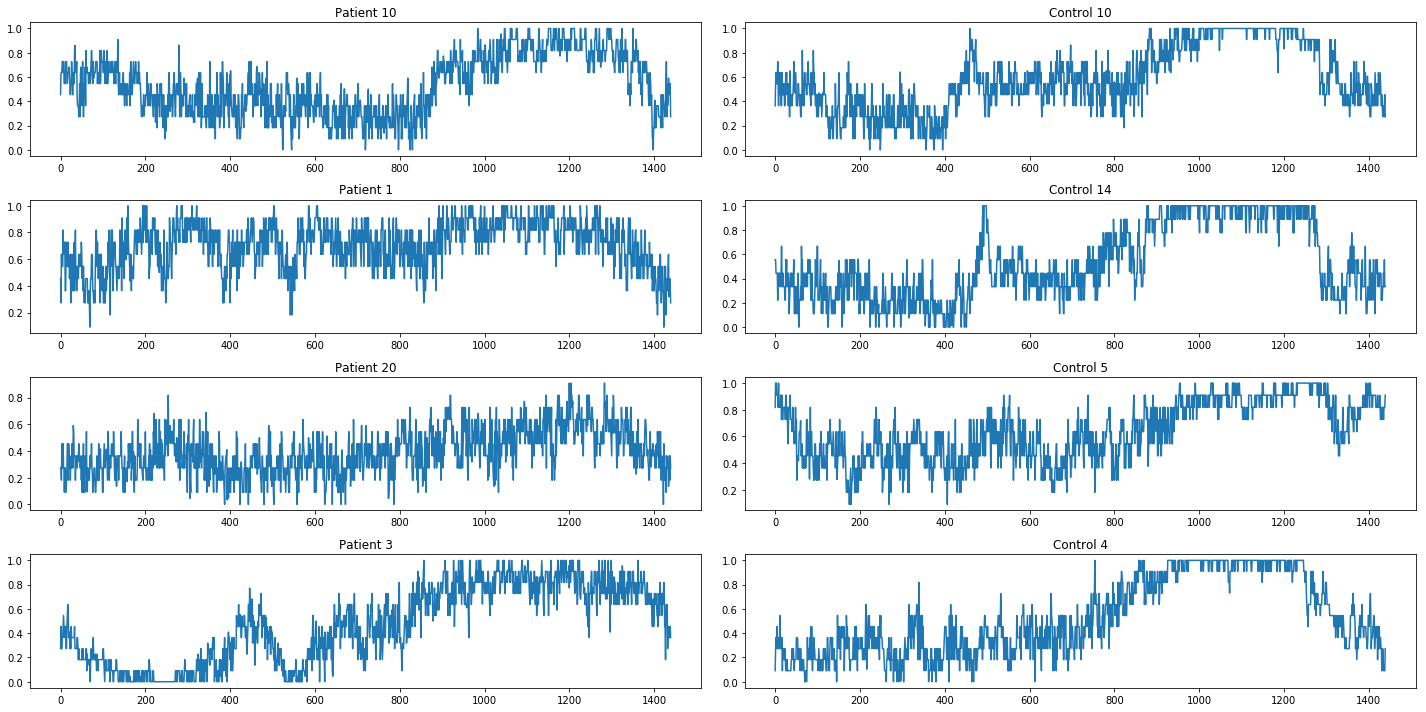

In [21]:
fig, ((ax0,ax1),(ax2,ax3),(ax4,ax5), (ax6,ax7)) = plt.subplots(4, 2, figsize=(20, 10))
ax0.plot(day_mean_p[10][1,0,:])
ax0.set_title('Patient 10')
ax1.plot(day_mean_c[10][1,0,:])
ax1.set_title('Control 10')
ax2.plot(day_mean_p[1][1,0,:])
ax2.set_title('Patient 1')
ax3.plot(day_mean_c[14][1,0,:])
ax3.set_title('Control 14')
ax4.plot(day_mean_p[20][1,0,:])
ax4.set_title('Patient 20')
ax5.plot(day_mean_c[5][1,0,:])
ax5.set_title('Control 5')
ax6.plot(day_mean_p[3][1,0,:])
ax6.set_title('Patient 3')
ax7.plot(day_mean_c[4][1,0,:])
ax7.set_title('Control 4')
fig.tight_layout()

In [62]:
hidden_states_p = patients_res[10].state_seq
hidden_states_c = control_res[10].state_seq

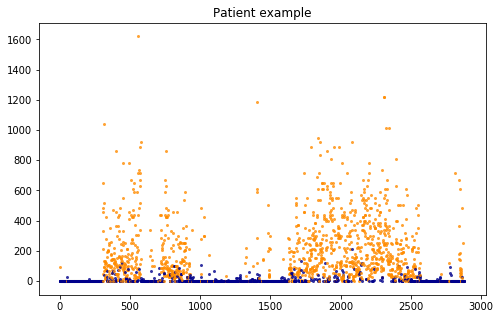

In [63]:
fig = plt.figure(figsize=(8,5))
color = ['darkorange' if x==1 else 'darkblue'for x in hidden_states_p[:2880]]
for x, l, c in zip(range(0,2880), shizophrenia_p[10][:2880], color):
    plt.scatter(x, l, alpha=0.8, c=c,marker='.', linewidths=0.01) 
    plt.title('Patient example')

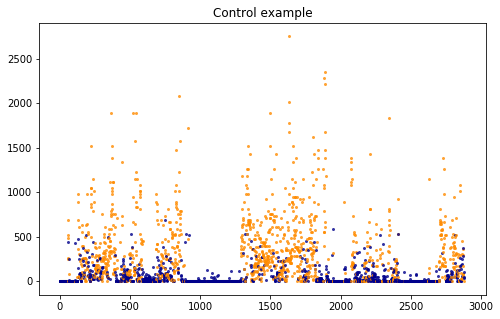

In [64]:
fig = plt.figure(figsize=(8,5))
color = ['darkorange' if x==1 else 'darkblue'for x in hidden_states_c[:2880]]
for x, l, c in zip(range(0,2880), shizophrenia_c[10][:2880], color):
    plt.scatter(x, l, alpha=0.8, c=c,marker='.', linewidths=0.01) 
    plt.title('Control example')

Text(0.5,1,'Patient Example')

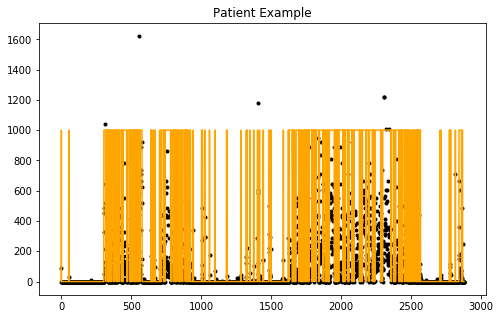

Text(0.5,1,'Control Example')

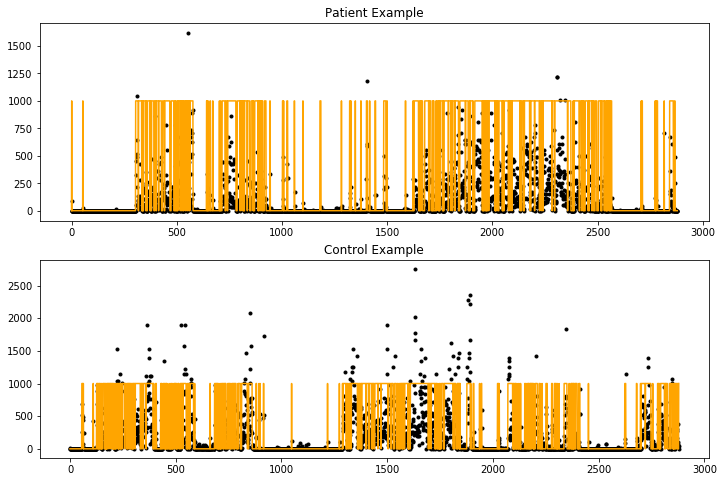

In [74]:
fig, (ax0,ax1) = plt.subplots(2, 1, figsize=(12, 8))
ax0.plot(hidden_states_p[:2880]*1000, color='orange')
ax0.scatter(range(0,2880), shizophrenia_p[10][:2880], marker = '.', color='black')
ax0.set_title('Patient Example')
ax1.scatter(range(0,2880), shizophrenia_c[10][:2880], marker = '.', color='black')
ax1.plot(hidden_states_c[:2880]*1000, color='orange')
ax1.set_title('Control Example')

### Mean Transitions probs

In [22]:
# Mean Transitions
trans_p_00 = np.array([np.mean(patients_res[i].trans_mat[0,0,:]) for i in range(0,len(patients_res))])
trans_c_00 = np.array([np.mean(control_res[i].trans_mat[0,0,:]) for i in range(0,len(control_res))])
trans_p_11 = np.array([np.mean(patients_res[i].trans_mat[1,1,:]) for i in range(0,len(patients_res))])
trans_c_11 = np.array([np.mean(control_res[i].trans_mat[1,1,:]) for i in range(0,len(control_res))])
trans_p_01 = np.array([np.mean(patients_res[i].trans_mat[0,1,:]) for i in range(0,len(patients_res))])
trans_c_01 = np.array([np.mean(control_res[i].trans_mat[0,1,:]) for i in range(0,len(control_res))])
trans_p_10 = np.array([np.mean(patients_res[i].trans_mat[1,0,:]) for i in range(0,len(patients_res))])
trans_c_10 = np.array([np.mean(control_res[i].trans_mat[1,0,:]) for i in range(0,len(control_res))])

In [23]:
trans_01 = np.concatenate((trans_p_01,trans_c_01))
trans_10 = np.concatenate((trans_p_10,trans_c_10))
trans_00 = np.concatenate((trans_p_00,trans_c_00))
trans_11 = np.concatenate((trans_p_11,trans_c_11))

In [24]:
con = np.concatenate((np.ones(len(trans_p_01)),np.zeros(len(trans_c_01))))
feat_dic = {'trans_00': trans_00, 'trans_10': trans_10, 'trans_01': trans_01,'trans_11': trans_11,'condition': con }
time_dep_hmm = pd.DataFrame(feat_dic)

In [25]:
char00 = np.empty(shape=(len(trans_00),), dtype='<U5')
char01 = np.empty(shape=(len(trans_01),), dtype='<U5')
char10 = np.empty(shape=(len(trans_10),), dtype='<U5')
char11 = np.empty(shape=(len(trans_11),), dtype='<U5')
con = np.tile(np.concatenate((np.ones(len(trans_p_01)),np.zeros(len(trans_c_01)))), 4)
labels = np.empty(shape=(len(con),), dtype='<U5')
labels[np.where(con==0)] = 'Control'
labels[np.where(con==1)] = 'Patient'
char00[:] = '0,0'
char01[:] = '0,1'
char10[:] = '1,0'
char11[:] = '1,1'
chars = np.squeeze(np.concatenate((char00,char01,char10,char11)))
probs = np.concatenate((trans_00,trans_01,trans_10,trans_11))
dic_ = {'Probability': probs, 'Transitions': chars, 'Condition': labels }
plot_data = pd.DataFrame(dic_)


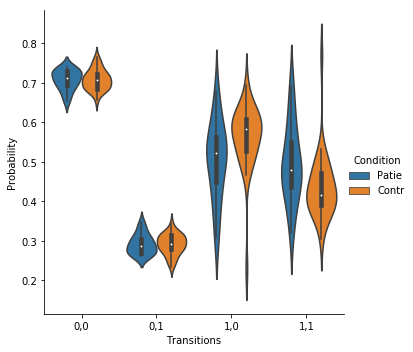

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.catplot(x="Transitions", y="Probability",kind="violin",hue="Condition", data=plot_data)

### Calculate the fluctuation in the transition probs

In [ ]:
var_p_00 = np.array([np.var(patients_res[i].trans_mat[0,0,:]) for i in range(0,len(patients_res))])
var_c_00 = np.array([np.var(control_res[i].trans_mat[0,0,:]) for i in range(0,len(control_res))])
var_p_11 = np.array([np.var(patients_res[i].trans_mat[1,1,:]) for i in range(0,len(patients_res))])
var_c_11 = np.array([np.var(control_res[i].trans_mat[1,1,:]) for i in range(0,len(control_res))])
var_p_01 = np.array([np.var(patients_res[i].trans_mat[0,1,:]) for i in range(0,len(patients_res))])
var_c_01 = np.array([np.var(control_res[i].trans_mat[0,1,:]) for i in range(0,len(control_res))])
var_p_10 = np.array([np.var(patients_res[i].trans_mat[1,0,:]) for i in range(0,len(patients_res))])
var_c_10 = np.array([np.var(control_res[i].trans_mat[1,0,:]) for i in range(0,len(control_res))])

In [ ]:
var_01 = np.concatenate((var_p_01,var_c_01))
var_10 = np.concatenate((var_p_10,var_c_10))
var_00 = np.concatenate((var_p_00,var_c_00))
var_11 = np.concatenate((var_p_11,var_c_11))

In [ ]:
patients_res[1].means

### State features

In [ ]:
mean_p_0 = np.array([patients_res[i].means[0] for i in range(0,len(patients_res))])
mean_c_0 = np.array([control_res[i].means[0] for i in range(0,len(control_res))])
mean_p_1 = np.array([patients_res[i].means[1] for i in range(0,len(patients_res))])
mean_c_1 = np.array([control_res[i].means[1] for i in range(0,len(control_res))])
var_p_0 = np.array([patients_res[i].cov[0] for i in range(0,len(patients_res))])
var_c_0 = np.array([control_res[i].cov[0] for i in range(0,len(control_res))])
var_p_1 = np.array([patients_res[i].cov[1] for i in range(0,len(patients_res))])
var_c_1 = np.array([control_res[i].cov[1] for i in range(0,len(control_res))])

In [ ]:
var_0 = np.concatenate((var_p_0,var_c_0))
var_1 = np.concatenate((var_p_1,var_c_1))
mean_0 = np.concatenate((mean_p_0,mean_c_0))
mean_1 = np.concatenate((mean_p_1,mean_c_1))

In [ ]:
con = np.concatenate((np.ones(len(trans_p_01)),np.zeros(len(trans_c_01))))
feat_dic = {'trans_00': trans_00, 'trans_10': trans_10, 
            'trans_01': trans_01,'trans_11': trans_11,'var_01':var_01, 'var_00':var_00, 
            'var_10':var_10, 'var_11': var_11,
            'var_0':var_0,'var_1':var_1, 'mean_0':mean_0, 'mean_1':mean_1, 'condition': con }
time_dep_hmm = pd.DataFrame(feat_dic)

In [ ]:
fig = plt.figure(figsize=(8,5))
color = ['darkorange' if x>0 else 'navy' for x in time_dep_hmm['condition']]
shape = ['d' if k>0 else 'd' for k in time_dep_hmm['condition']]
for x, l, c, m in zip( time_dep_hmm['var_01'],  time_dep_hmm['var_1'], color, shape):
    plt.scatter(x, l, alpha=0.8, c=c,marker=m)  
    plt.xlabel('var_01')
    plt.ylabel('var_1')
    plt.title('Link components')

In [ ]:
import seaborn as sns
X = time_dep_hmm.drop(['condition', 'trans_11', 'trans_00', 'var_00', 'var_11', 'mean_0', 'var_0'], axis=1)
y = time_dep_hmm['condition']
corr = X.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, annot=True, cmap="rocket")

In [ ]:
# Logisitc Regression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_curve, average_precision_score, log_loss
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix, matthews_corrcoef

X = time_dep_hmm.drop(['condition', 'trans_11', 'trans_00', 'var_00', 'var_11',
                      'mean_0', 'var_0'], axis=1)
y = time_dep_hmm['condition']
#Standardize the data 
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns= X.columns.values)
X_train,  X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=123,  shuffle=True)
k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
class_weight = 'balanced'
penalty = 'l1'
C= [50,10, 5, 1, 0.8, 0.5, 0.3, 0.1, 0.08, 0.05, 0.03, 0.01]
n_jobs =1
solver='liblinear'
coefs = []
areaUnderROC = []
average_precision = []
for c in C: 
    logReg = LogisticRegression(C=c,random_state=133,penalty = penalty, solver=solver, n_jobs=n_jobs,fit_intercept=True )

    trainingScores = []
    cvScores = []
    
    predictionsBasedOnKFolds = pd.DataFrame(data=[],index=y_train.index,columns=[0,1])

    for train_index, test_index in k_fold.split(X_train,y_train):
        X_train_fold, X_cv_fold = X_train.iloc[train_index,:], X_train.iloc[test_index,:]
        y_train_fold, y_cv_fold = y_train.iloc[train_index],y_train.iloc[test_index]

        logReg.fit(X_train_fold, y_train_fold)
        loglossTraining = log_loss(y_train_fold,logReg.predict_proba(X_train_fold)[:,1])
    

        trainingScores.append(loglossTraining)

        predictionsBasedOnKFolds.loc[X_cv_fold.index,:] = logReg.predict_proba(X_cv_fold)
        loglossCV = log_loss(y_cv_fold, predictionsBasedOnKFolds.loc[X_cv_fold.index,1])
        cvScores.append(loglossCV)
        preds = pd.concat([y_train,predictionsBasedOnKFolds.loc[:,1]], axis=1)
        preds.columns = ['trueLabel','prediction']
        predictionsBasedOnKFoldsLogisticRegression = preds.copy()
    fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])
    average_precision.append(average_precision_score(preds['trueLabel'],
                                            preds['prediction']))
    areaUnderROC.append(auc(fpr, tpr))
    
    coefs.append(logReg.coef_)
    
coefs = pd.DataFrame(np.squeeze(np.asarray(coefs)), columns = X.columns)  
coefs['C'] = C

res = np.concatenate((np.array(areaUnderROC,ndmin=2),np.array(average_precision,ndmin=2)),axis=0)
res = res.reshape(12,2)
pred_res = pd.DataFrame(res, columns = ['AUC', 'Avg_Precision'])

In [ ]:
print(C)
fig = plt.figure()
plt.plot(pred_res['AUC'], ls='-.', color='blue')
plt.plot(pred_res['Avg_Precision'], ls='--',color='darkgreen' )
plt.xticks(range(0,len(C)),C)
plt.xlim(1.0)
plt.legend(title='', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.xlabel('C parameter')
plt.ylabel('Predicition Score')
print('Max AUC at C: ',C[np.argmax(pred_res['AUC'])])
print('Max AUC: ',np.max(pred_res['AUC']))
print('Max Average Precision at C: ',C[np.argmax(pred_res['Avg_Precision'])])
print('Max Average Precision: ',np.max(pred_res['Avg_Precision']))

### L1 Regularization Plot Coefficients 

In [ ]:
coefs

In [ ]:
coefs_plot = coefs.drop(['C'], axis=1)
coefs_plot.plot()                 
plt.xticks(range(0,len(C)),C)
plt.legend(title='', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.xlabel('C parameter')
plt.ylabel('Coefficient value')

### Iteration step 1

In [ ]:
from statsmodels.discrete.discrete_model import Logit
from statsmodels import tools
X = time_dep_hmm.drop(['condition', 'trans_11', 'trans_00', 'var_00', 'var_11',
                      'mean_0', 'var_0', 'trans_10', 'var_1'], axis=1)
y = time_dep_hmm['condition']

#Standardize the data 
scaler = StandardScaler()
for f in X.columns:
    X = pd.DataFrame(scaler.fit_transform(X), columns= X.columns.values)
    dat = tools.add_constant(X[f])
    log_reg = Logit(y, dat).fit()
    print(log_reg.summary())
  

In [ ]:
plt.scatter(time_dep_hmm['var_01'],time_dep_hmm['trans_01'],marker='.')

## Iteration step 2

In [ ]:
from statsmodels.discrete.discrete_model import Logit
from statsmodels import tools
X = time_dep_hmm.drop(['condition', 'trans_11', 'trans_00', 'var_00', 'var_11',
                      'mean_0', 'var_0','trans_10', 'var_1'], axis=1)
feat_n = X.columns.drop(['mean_1'])

y = time_dep_hmm['condition']

#Standardize the data 
scaler = StandardScaler()
for f in feat_n:
    print(f)
    X = pd.DataFrame(scaler.fit_transform(X), columns= X.columns.values)
    dat = tools.add_constant(X[['mean_1',f]])
    log_reg = Logit(y, dat).fit()
    print(log_reg.summary())
  

## Iteration step 3

In [ ]:
from statsmodels.discrete.discrete_model import Logit
from statsmodels import tools
X = time_dep_hmm.drop(['condition', 'trans_11', 'trans_00', 'var_00', 'var_11',
                      'mean_0', 'var_0','var_1','trans_10', 'var_1'], axis=1)
feat_n = X.columns.drop(['mean_1','trans_01'])

y = time_dep_hmm['condition']

#Standardize the data 
scaler = StandardScaler()
for f in feat_n:
    print(f)
    X = pd.DataFrame(scaler.fit_transform(X), columns= X.columns.values)
    dat = tools.add_constant(X[['mean_1','trans_01',f]])
    log_reg = Logit(y, dat).fit()
    print(log_reg.summary())
  

## Final Model 

In [ ]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_curve, average_precision_score, log_loss
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix, matthews_corrcoef
X = time_dep_hmm.drop(['condition', 'trans_11', 'trans_00', 'var_00', 'var_11',
                      'mean_0', 'var_0','trans_10', 'var_1'], axis=1)
#X = hmm_feat[['trans_01','mean_1', 'trans_10']]
X = time_dep_hmm[['var_01','mean_1','trans_01']]
scaler = StandardScaler()
X_std = pd.DataFrame(scaler.fit_transform(X), columns= X.columns.values)
y = time_dep_hmm['condition']

X_train,  X_test, y_train, y_test = train_test_split(X_std,y,test_size=0.1,random_state=0,  shuffle=True)
k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)


# Logisitc Regression
class_weight = 'balanced'
penalty = 'l1'
C=1
n_jobs =1
solver='liblinear'
logReg = LogisticRegression(C=C,random_state=133,penalty = penalty, solver=solver, n_jobs=n_jobs, fit_intercept=True )

trainingScores = []
cvScores = []
predictionsBasedOnKFolds = pd.DataFrame(data=[],index=y_train.index,columns=[0,1])

for train_index, test_index in k_fold.split(X_train,y_train):
    X_train_fold, X_cv_fold = X_train.iloc[train_index,:], X_train.iloc[test_index,:]
    y_train_fold, y_cv_fold = y_train.iloc[train_index],y_train.iloc[test_index]

    logReg.fit(X_train_fold, y_train_fold)
    loglossTraining = log_loss(y_train_fold,logReg.predict_proba(X_train_fold)[:,1])
    

    trainingScores.append(loglossTraining)
    predictionsBasedOnKFolds.loc[X_cv_fold.index,:] = logReg.predict_proba(X_cv_fold)
    loglossCV = log_loss(y_cv_fold, predictionsBasedOnKFolds.loc[X_cv_fold.index,1])
    cvScores.append(loglossCV)



preds = pd.concat([y_train,predictionsBasedOnKFolds.loc[:,1]], axis=1)
preds.columns = ['trueLabel','prediction']
predictionsBasedOnKFoldsLogisticRegression = preds.copy()


precision, recall, thresholds = precision_recall_curve(preds['trueLabel'],preds['prediction'])


average_precision = average_precision_score(preds['trueLabel'],
                                            preds['prediction'])

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('PRC: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])
areaUnderROC = auc(fpr, tpr)
print('Confusion matrix:')
print(confusion_matrix(preds['trueLabel'],preds['prediction'].astype(np.double).round()))
print('Matthews Corr Coef: ',matthews_corrcoef(preds['trueLabel'],preds['prediction'].astype(np.double).round()))


plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC: AUC = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_curve, average_precision_score, log_loss
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix, matthews_corrcoef
X = time_dep_hmm.drop(['condition', 'trans_11', 'trans_00', 'var_00', 'var_11',
                      'mean_0', 'var_0','trans_10', 'var_1'], axis=1)
#X = hmm_feat[['trans_01','mean_1', 'trans_10']]
X = time_dep_hmm[['var_10','mean_1','trans_01']]
scaler = StandardScaler()
X_std = pd.DataFrame(scaler.fit_transform(X), columns= X.columns.values)
y = time_dep_hmm['condition']

X_train,  X_test, y_train, y_test = train_test_split(X_std,y,test_size=0.1,random_state=0,  shuffle=True)
k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)


# Logisitc Regression
class_weight = 'balanced'
penalty = 'l1'
C=1
n_jobs =1
solver='liblinear'
logReg = LogisticRegression(C=C,random_state=133,penalty = penalty, solver=solver, n_jobs=n_jobs, fit_intercept=True )

trainingScores = []
cvScores = []
predictionsBasedOnKFolds = pd.DataFrame(data=[],index=y_train.index,columns=[0,1])

for train_index, test_index in k_fold.split(X_train,y_train):
    X_train_fold, X_cv_fold = X_train.iloc[train_index,:], X_train.iloc[test_index,:]
    y_train_fold, y_cv_fold = y_train.iloc[train_index],y_train.iloc[test_index]

    logReg.fit(X_train_fold, y_train_fold)
    loglossTraining = log_loss(y_train_fold,logReg.predict_proba(X_train_fold)[:,1])
    

    trainingScores.append(loglossTraining)
    predictionsBasedOnKFolds.loc[X_cv_fold.index,:] = logReg.predict_proba(X_cv_fold)
    loglossCV = log_loss(y_cv_fold, predictionsBasedOnKFolds.loc[X_cv_fold.index,1])
    cvScores.append(loglossCV)



preds = pd.concat([y_train,predictionsBasedOnKFolds.loc[:,1]], axis=1)
preds.columns = ['trueLabel','prediction']
predictionsBasedOnKFoldsLogisticRegression = preds.copy()


precision, recall, thresholds = precision_recall_curve(preds['trueLabel'],preds['prediction'])


average_precision = average_precision_score(preds['trueLabel'],
                                            preds['prediction'])

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('PRC: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])
areaUnderROC = auc(fpr, tpr)
print('Confusion matrix:')
print(confusion_matrix(preds['trueLabel'],preds['prediction'].astype(np.double).round()))
print('Matthews Corr Coef: ',matthews_corrcoef(preds['trueLabel'],preds['prediction'].astype(np.double).round()))


plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC: AUC = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

In [ ]:
print('Precision:', np.mean(precision))
print('Recall:', np.mean(recall))

confusion_matrix(y_test, logReg.predict(X_test))

average_precision = average_precision_score(y_test,logReg.predict(X_test))


print('Average Precision Test:',average_precision )
precision, recall, thresholds = precision_recall_curve(y_test,logReg.predict(X_test))
plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('PRC: Average Precision Test = {0:0.2f}'.format(
          average_precision))
